# Model evaluation
---

In [44]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def plot_history (filename):
    history = pd.read_csv (filename)
    history.rename (columns={'Unnamed: 0': 'epoch'}, inplace=True)
    
    fig, axs = plt.subplots (1,2)
    
    axs[0].plot (history['epoch'], history['fbeta'])
    axs[0].plot (history['epoch'], history['val_fbeta'])
    axs[0].legend ()
    
    axs[1].plot (history['epoch'], history['loss'])
    axs[1].plot (history['epoch'], history['val_loss'])
    axs[1].legend ()
    
    fig.set_size_inches ((15, 6))
    plt.show ()
    
    return history

def running_mean (x, N):
    cumsum = np.cumsum (np.insert (x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / N

## last model
is reference for further work

- no image standardization

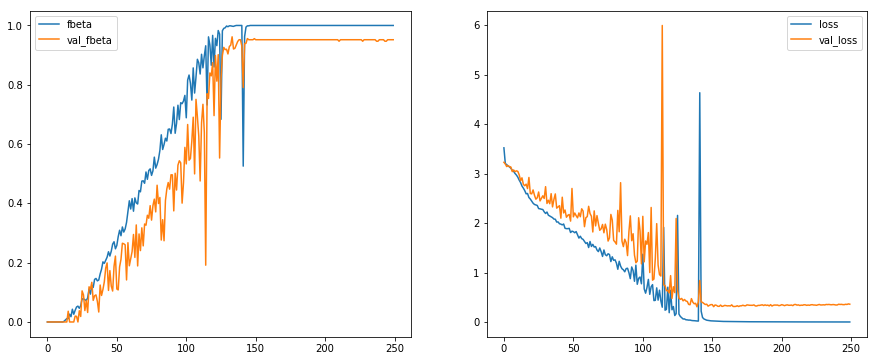

In [15]:
history = plot_history ('20180906-140724_model.hist.csv')

In [16]:
history.head ()

,epoch,fbeta,loss,val_fbeta,val_loss
0,0,9.878489e-09,3.523146,1.041667e-08,3.231035
1,1,1.000000e-08,3.205881,1.041667e-08,3.197504
2,2,1.000000e-08,3.182902,1.041667e-08,3.144299
3,3,1.000000e-08,3.156921,1.041667e-08,3.163419
4,4,1.000000e-08,3.137524,1.041667e-08,3.143163


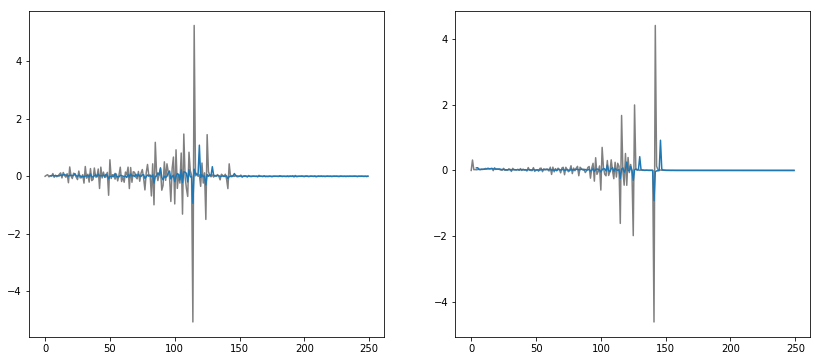

In [66]:
diff_val_loss = (history['val_loss'].shift () - history['val_loss']).fillna (0)
diff_val_loss = pd.DataFrame (history['epoch']).join (diff_val_loss)

diff_loss = (history['loss'].shift () - history['loss']).fillna (0)
diff_loss = pd.DataFrame (history['epoch']).join (diff_loss)

fig, axs = plt.subplots (1,2)
axs[0].plot (diff_val_loss['epoch'], diff_val_loss['val_loss'], color='grey')
smoothed_val_loss = running_mean (diff_val_loss['val_loss'].values, 5)
axs[0].plot (diff_val_loss['epoch'][-len(smoothed_val_loss):], smoothed_val_loss)

axs[1].plot (diff_loss['epoch'], diff_loss['loss'], color='grey')
smoothed_loss = running_mean (diff_loss['loss'].values, 5)
axs[1].plot (diff_loss['epoch'][-len(smoothed_loss):], smoothed_loss)

fig.set_size_inches ((14, 6))
plt.show ()

In [67]:
diff_val_loss.describe ()
#diff_loss.describe ()

,epoch,val_loss
count,250.000000,250.000000
mean,124.500000,0.011478
std,72.312977,0.547732
min,0.000000,-5.066177
25%,62.250000,-0.017880
50%,124.500000,0.001820
75%,186.750000,0.045754
max,249.000000,5.243836


## model

In [96]:
with open ('20180906-151918_model.param.txt','r') as f:
    output = f.read ()
    print (output)

{'loss': "<class 'function'>", 'mom': 0.0, 'seed': 42, 'use_img_std': True, 'lr': 0.01, 'opt': "<class 'keras.optimizers.SGD'>"}


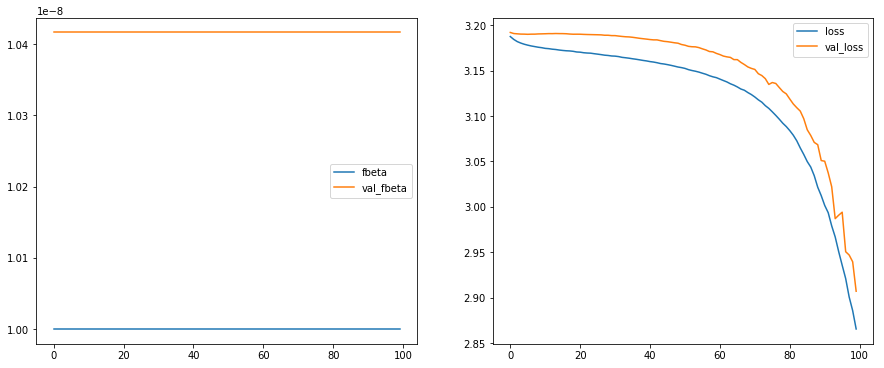

In [97]:
history = plot_history ('20180906-151918_model.hist.csv')

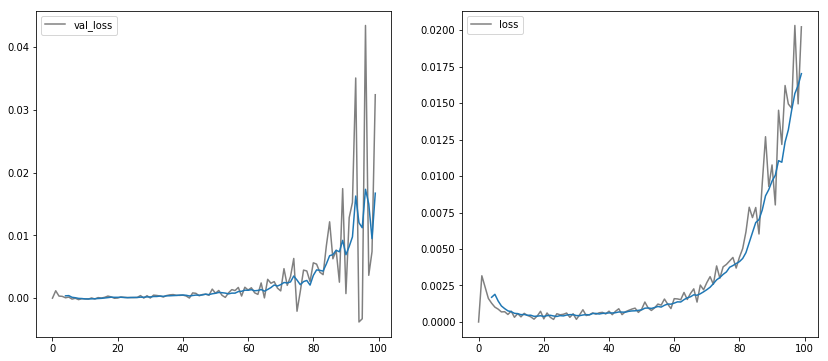

In [99]:
diff_val_loss = (history['val_loss'].shift () - history['val_loss']).fillna (0)
diff_val_loss = pd.DataFrame (history['epoch']).join (diff_val_loss)

diff_loss = (history['loss'].shift () - history['loss']).fillna (0)
diff_loss = pd.DataFrame (history['epoch']).join (diff_loss)

fig, axs = plt.subplots (1,2)
axs[0].plot (diff_val_loss['epoch'], diff_val_loss['val_loss'], color='grey')
smoothed_val_loss = running_mean (diff_val_loss['val_loss'].values, 5)
axs[0].plot (diff_val_loss['epoch'][-len(smoothed_val_loss):], smoothed_val_loss)
axs[0].legend ()

axs[1].plot (diff_loss['epoch'], diff_loss['loss'], color='grey')
smoothed_loss = running_mean (diff_loss['loss'].values, 5)
axs[1].plot (diff_loss['epoch'][-len(smoothed_loss):], smoothed_loss)
axs[1].legend ()

fig.set_size_inches ((14, 6))
plt.show ()

In [84]:
with open ('20180906-155602_model.param.txt','r') as f:
    output = f.read ()
    print (output)

{'batch_size': 64, 'loss': "<class 'function'>", 'val_split': 0.10256410256410256, 'mom': 0.0, 'seed': 42, 'use_img_std': True, 'lr': 0.1, 'epochs': 50, 'opt': "<class 'keras.optimizers.SGD'>"}


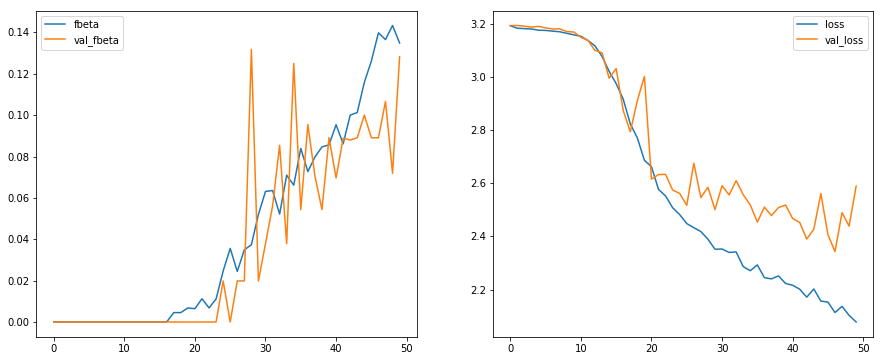

In [85]:
history = plot_history ('20180906-155602_model.hist.csv')

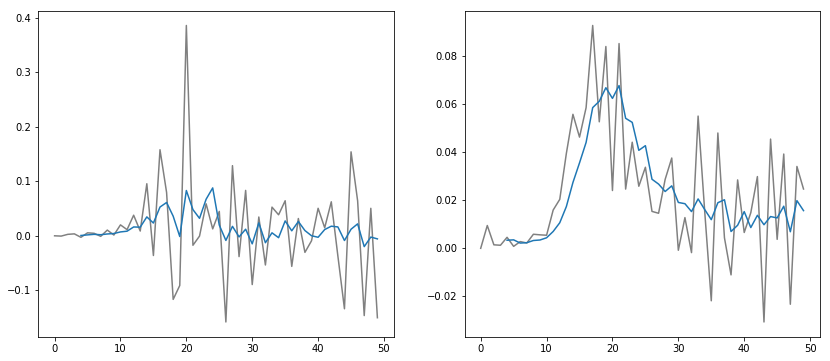

In [86]:
diff_val_loss = (history['val_loss'].shift () - history['val_loss']).fillna (0)
diff_val_loss = pd.DataFrame (history['epoch']).join (diff_val_loss)

diff_loss = (history['loss'].shift () - history['loss']).fillna (0)
diff_loss = pd.DataFrame (history['epoch']).join (diff_loss)

fig, axs = plt.subplots (1,2)
axs[0].plot (diff_val_loss['epoch'], diff_val_loss['val_loss'], color='grey')
smoothed_val_loss = running_mean (diff_val_loss['val_loss'].values, 5)
axs[0].plot (diff_val_loss['epoch'][-len(smoothed_val_loss):], smoothed_val_loss)

axs[1].plot (diff_loss['epoch'], diff_loss['loss'], color='grey')
smoothed_loss = running_mean (diff_loss['loss'].values, 5)
axs[1].plot (diff_loss['epoch'][-len(smoothed_loss):], smoothed_loss)

fig.set_size_inches ((14, 6))
plt.show ()

In [87]:
with open ('20180906-163025_model.param.txt','r') as f:
    output = f.read ()
    print (output)

{'batch_size': 40, 'loss': "<class 'function'>", 'val_split': 0.10256410256410256, 'mom': 0.0, 'seed': 42, 'use_img_std': True, 'lr': 0.1, 'epochs': 50, 'opt': "<class 'keras.optimizers.SGD'>"}


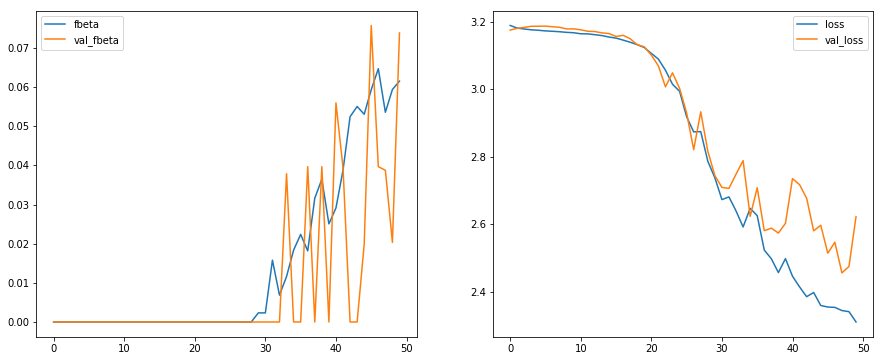

In [88]:
history = plot_history ('20180906-163025_model.hist.csv')

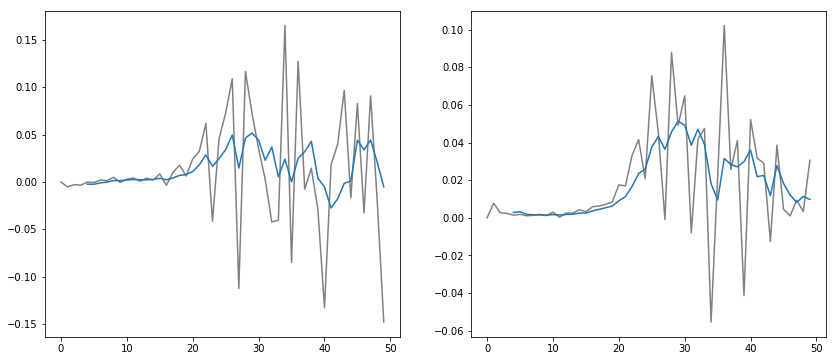

In [89]:
diff_val_loss = (history['val_loss'].shift () - history['val_loss']).fillna (0)
diff_val_loss = pd.DataFrame (history['epoch']).join (diff_val_loss)

diff_loss = (history['loss'].shift () - history['loss']).fillna (0)
diff_loss = pd.DataFrame (history['epoch']).join (diff_loss)

fig, axs = plt.subplots (1,2)
axs[0].plot (diff_val_loss['epoch'], diff_val_loss['val_loss'], color='grey')
smoothed_val_loss = running_mean (diff_val_loss['val_loss'].values, 5)
axs[0].plot (diff_val_loss['epoch'][-len(smoothed_val_loss):], smoothed_val_loss)

axs[1].plot (diff_loss['epoch'], diff_loss['loss'], color='grey')
smoothed_loss = running_mean (diff_loss['loss'].values, 5)
axs[1].plot (diff_loss['epoch'][-len(smoothed_loss):], smoothed_loss)

fig.set_size_inches ((14, 6))
plt.show ()

In [90]:
with open ('20180906-170156_model.param.txt','r') as f:
    output = f.read ()
    print (output)

{'batch_size': 40, 'loss': "<class 'function'>", 'val_split': 0.20512820512820512, 'mom': 0.0, 'seed': 42, 'use_img_std': True, 'lr': 0.1, 'epochs': 50, 'opt': "<class 'keras.optimizers.SGD'>"}


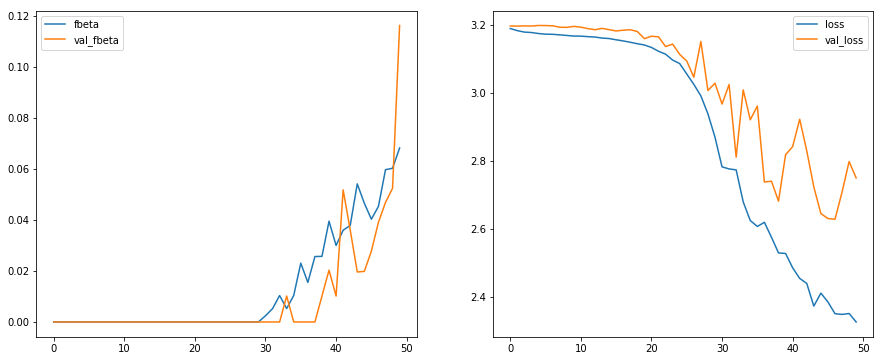

In [91]:
history = plot_history ('20180906-170156_model.hist.csv')

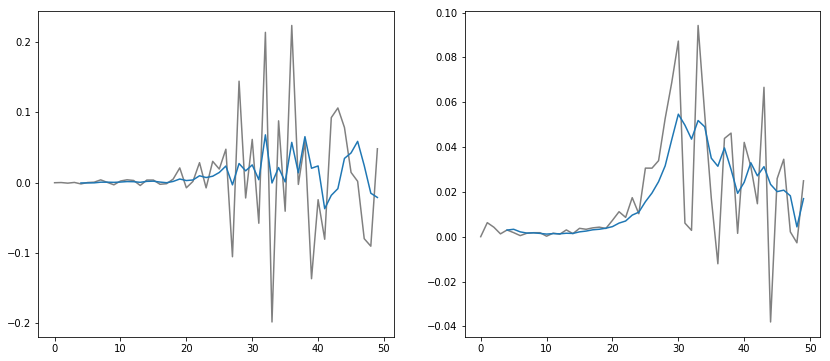

In [92]:
diff_val_loss = (history['val_loss'].shift () - history['val_loss']).fillna (0)
diff_val_loss = pd.DataFrame (history['epoch']).join (diff_val_loss)

diff_loss = (history['loss'].shift () - history['loss']).fillna (0)
diff_loss = pd.DataFrame (history['epoch']).join (diff_loss)

fig, axs = plt.subplots (1,2)
axs[0].plot (diff_val_loss['epoch'], diff_val_loss['val_loss'], color='grey')
smoothed_val_loss = running_mean (diff_val_loss['val_loss'].values, 5)
axs[0].plot (diff_val_loss['epoch'][-len(smoothed_val_loss):], smoothed_val_loss)

axs[1].plot (diff_loss['epoch'], diff_loss['loss'], color='grey')
smoothed_loss = running_mean (diff_loss['loss'].values, 5)
axs[1].plot (diff_loss['epoch'][-len(smoothed_loss):], smoothed_loss)

fig.set_size_inches ((14, 6))
plt.show ()

In [93]:
with open ('20180906-173423_model.param.txt','r') as f:
    output = f.read ()
    print (output)

{'batch_size': 62, 'loss': "<class 'function'>", 'val_split': 0.20512820512820512, 'mom': 0.0, 'seed': 42, 'use_img_std': True, 'lr': 0.1, 'epochs': 50, 'opt': "<class 'keras.optimizers.SGD'>"}


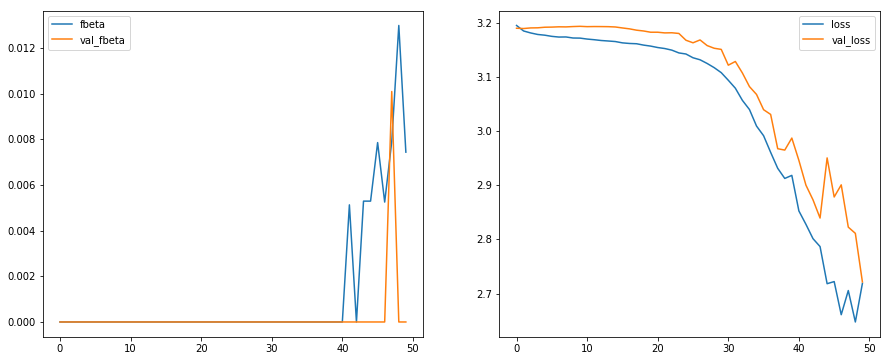

In [94]:
history = plot_history ('20180906-173423_model.hist.csv')

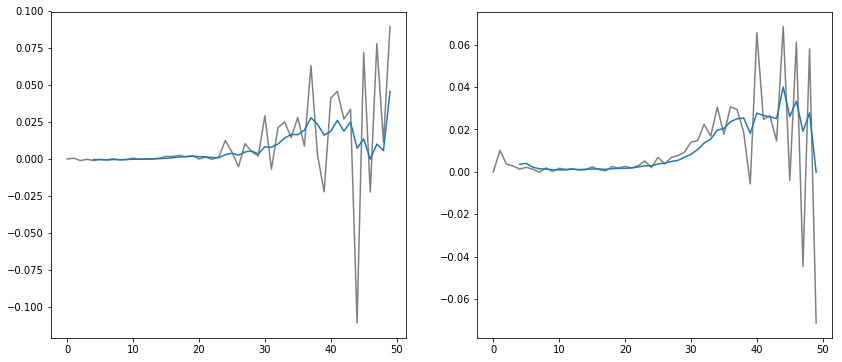

In [95]:
diff_val_loss = (history['val_loss'].shift () - history['val_loss']).fillna (0)
diff_val_loss = pd.DataFrame (history['epoch']).join (diff_val_loss)

diff_loss = (history['loss'].shift () - history['loss']).fillna (0)
diff_loss = pd.DataFrame (history['epoch']).join (diff_loss)

fig, axs = plt.subplots (1,2)
axs[0].plot (diff_val_loss['epoch'], diff_val_loss['val_loss'], color='grey')
smoothed_val_loss = running_mean (diff_val_loss['val_loss'].values, 5)
axs[0].plot (diff_val_loss['epoch'][-len(smoothed_val_loss):], smoothed_val_loss)

axs[1].plot (diff_loss['epoch'], diff_loss['loss'], color='grey')
smoothed_loss = running_mean (diff_loss['loss'].values, 5)
axs[1].plot (diff_loss['epoch'][-len(smoothed_loss):], smoothed_loss)

fig.set_size_inches ((14, 6))
plt.show ()

In [ ]:
# mehr Daten frür Lernen -> val_split = 6/39 (~15 %) -> 792 training samples -> batch_size = 44